In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [77]:
# read in and parse baseline data

dims=[]
cr=[]
cm=[]
llcs=[]
llcsm=[]
llcl=[]
llclm=[]
elapsed=[]

with open('datasets/working_set.out') as f:
    for line in f:
        if 'Performance counter stats' in line:
            line_split = line.split()
            dims.append( int( line_split[-1][:-2] ) )
        elif 'cache-references' in line:
            line_split = line.split()
            cr.append( float( line_split[0].replace(',', '') ) )
        elif 'cache-misses' in line:
            line_split = line.split()
            cm.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-stores' in line:
            line_split = line.split()
            llcs.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-store-misses' in line:
            line_split = line.split()
            llcsm.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-loads' in line:
            line_split = line.split()
            llcl.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-load-misses' in line:
            line_split = line.split()
            llclm.append( float( line_split[0].replace(',', '') ) )
        elif 'seconds time elapsed' in line:
            line_split = line.split()
            elapsed.append( float( line_split[0].replace(',', '') ) )

In [78]:
df = pd.DataFrame()
df['dims'] = dims
df['cache-references'] = cr
df['cache-misses'] = cm
df['LLC-stores'] = llcs
df['LLC-store-misses'] = llcsm
df['LLC-loads'] = llcl
df['LLC-load-misses'] = llclm
df['LLC-load_misses %' ] = ( df['LLC-load-misses'] / df['LLC-loads'] )
df['LLC-load_misses %' ] = df['LLC-load_misses %' ].round(2)
df['elapsed'] = elapsed
df['elapsed'] = df['elapsed'].round(2)


df

,dims,cache-references,cache-misses,LLC-stores,LLC-store-misses,LLC-loads,LLC-load-misses,LLC-load_misses %,elapsed
0,1000,2.662386e+07,4.669265e+06,353330.0,21538.0,255267.0,17670.0,0.07,0.18
1,2000,1.084282e+08,7.220863e+07,2398811.0,860451.0,703074.0,510777.0,0.73,0.73
2,4000,4.507932e+08,3.237625e+08,11227639.0,5314537.0,2323930.0,2053744.0,0.88,2.93
3,8000,1.775454e+09,1.320042e+09,50123926.0,24099435.0,8200439.0,7568447.0,0.92,11.57


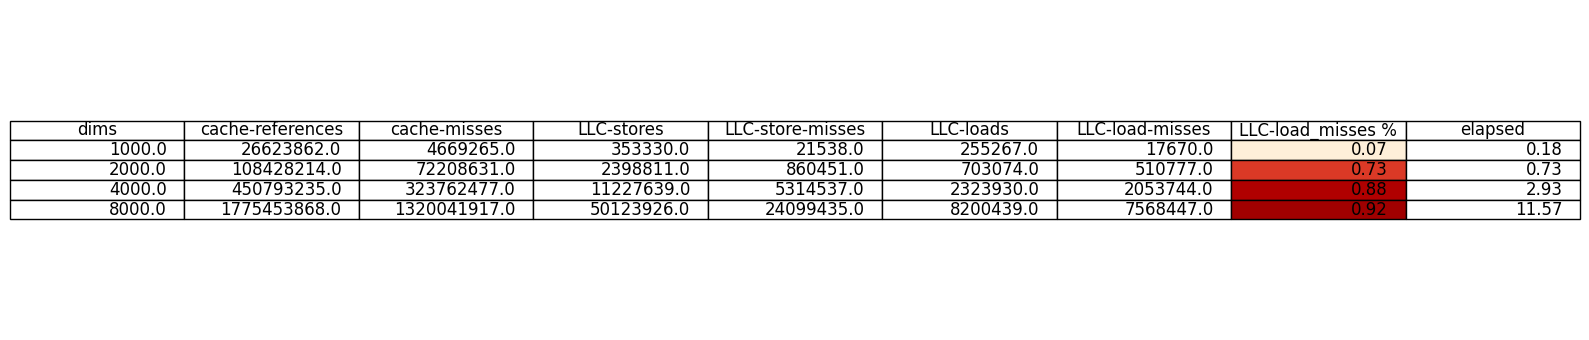

In [79]:
plt.rcParams['figure.figsize'] = [16, 3.5 ]
plt.rcParams['figure.autolayout'] = True
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

colors=[]
colormap = plt.cm.get_cmap('OrRd')
for x in df['LLC-load_misses %' ]:
    colors.append( colormap( x ) )

the_table = ax.table( cellText=df.values, colLabels=df.columns, loc='center')

the_table.get_celld()[(1,7)].set_facecolor(colors[0])
the_table.get_celld()[(2,7)].set_facecolor(colors[1])
the_table.get_celld()[(3,7)].set_facecolor(colors[2])
the_table.get_celld()[(4,7)].set_facecolor(colors[3])

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
plt.show()


In [80]:
# read in and parse tiling 8 unroll 1 data

dims=[]
cr=[]
cm=[]
llcs=[]
llcsm=[]
llcl=[]
llclm=[]
elapsed=[]

with open('datasets/working_set_tiled_8_unroll_1.out') as f:
    for line in f:
        if 'Performance counter stats' in line:
            line_split = line.split()
            dims.append( int( line_split[-1][:-2] ) )
        elif 'cache-references' in line:
            line_split = line.split()
            cr.append( float( line_split[0].replace(',', '') ) )
        elif 'cache-misses' in line:
            line_split = line.split()
            cm.append( float( line_split[0].replace(',', '') ) )
        if 'LLC-stores' in line:
            line_split = line.split()
            llcs.append( float( line_split[0].replace(',', '') ) )
        if 'LLC-store-misses' in line:
            line_split = line.split()
            llcsm.append( float( line_split[0].replace(',', '') ) )
        if 'LLC-loads' in line:
            line_split = line.split()
            llcl.append( float( line_split[0].replace(',', '') ) )
        if 'LLC-load-misses' in line:
            line_split = line.split()
            llclm.append( float( line_split[0].replace(',', '') ) )
        elif 'seconds time elapsed' in line:
            line_split = line.split()
            elapsed.append( float( line_split[0].replace(',', '') ) )


In [81]:
df = pd.DataFrame()
df['dims'] = dims
df['cache-references'] = cr
df['cache-misses'] = cm
df['LLC-stores'] = llcs
df['LLC-store-misses'] = llcsm
df['LLC-loads'] = llcl
df['LLC-load-misses'] = llclm
df['LLC-load_misses %' ] = ( df['LLC-load-misses'] / df['LLC-loads'] )
df['LLC-load_misses %' ] = df['LLC-load_misses %' ].round(2)
df['elapsed'] = elapsed
df['elapsed'] = df['elapsed'].round(2)

df

,dims,cache-references,cache-misses,LLC-stores,LLC-store-misses,LLC-loads,LLC-load-misses,LLC-load_misses %,elapsed
0,1000,1092331.0,347887.0,234584.0,62514.0,142743.0,8092.0,0.06,0.19
1,2000,5537461.0,1762733.0,980875.0,311231.0,671638.0,56584.0,0.08,0.77
2,4000,28234505.0,8914649.0,3970560.0,1403700.0,2874814.0,380720.0,0.13,3.07
3,8000,114858606.0,44333566.0,16080540.0,6977425.0,13896843.0,3197049.0,0.23,12.34


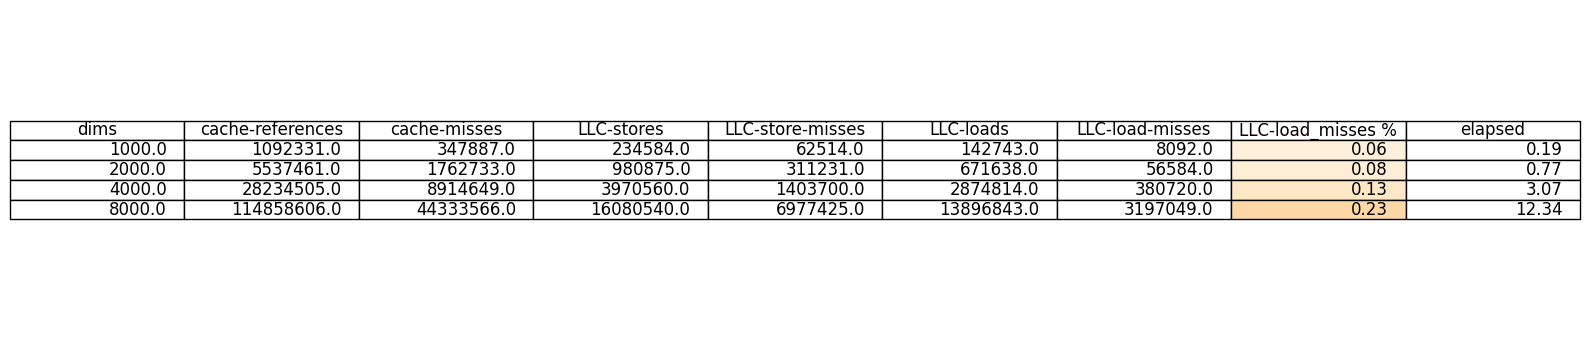

In [82]:
plt.rcParams['figure.figsize'] = [16, 3.5 ]
plt.rcParams['figure.autolayout'] = True
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

colors=[]
colormap = plt.cm.get_cmap('OrRd')
for x in df['LLC-load_misses %' ]:
    colors.append( colormap( x ) )

the_table = ax.table( cellText=df.values, colLabels=df.columns, loc='center')

the_table.get_celld()[(1,7)].set_facecolor(colors[0])
the_table.get_celld()[(2,7)].set_facecolor(colors[1])
the_table.get_celld()[(3,7)].set_facecolor(colors[2])
the_table.get_celld()[(4,7)].set_facecolor(colors[3])

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
plt.show()

In [83]:
# read in and parse tiled 8 unroll 2 data

dims=[]
cr=[]
cm=[]
llcs=[]
llcsm=[]
llcl=[]
llclm=[]
elapsed=[]

with open('datasets/working_set_tiled_8_unroll_2.out') as f:
    for line in f:
        if 'Performance counter stats' in line:
            line_split = line.split()
            dims.append( int( line_split[-1][:-2] ) )
        elif 'cache-references' in line:
            line_split = line.split()
            cr.append( float( line_split[0].replace(',', '') ) )
        elif 'cache-misses' in line:
            line_split = line.split()
            cm.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-stores' in line:
            line_split = line.split()
            llcs.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-store-misses' in line:
            line_split = line.split()
            llcsm.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-loads' in line:
            line_split = line.split()
            llcl.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-load-misses' in line:
            line_split = line.split()
            llclm.append( float( line_split[0].replace(',', '') ) )
        elif 'seconds time elapsed' in line:
            line_split = line.split()
            elapsed.append( float( line_split[0].replace(',', '') ) )

In [84]:
df = pd.DataFrame()
df['dims'] = dims
df['cache-references'] = cr
df['cache-misses'] = cm
df['LLC-stores'] = llcs
df['LLC-store-misses'] = llcsm
df['LLC-loads'] = llcl
df['LLC-load-misses'] = llclm
df['LLC-load_misses %' ] = ( df['LLC-load-misses'] / df['LLC-loads'] )
df['LLC-load_misses %' ] = df['LLC-load_misses %' ].round(2)
df['elapsed'] = elapsed
df['elapsed'] = df['elapsed'].round(2)

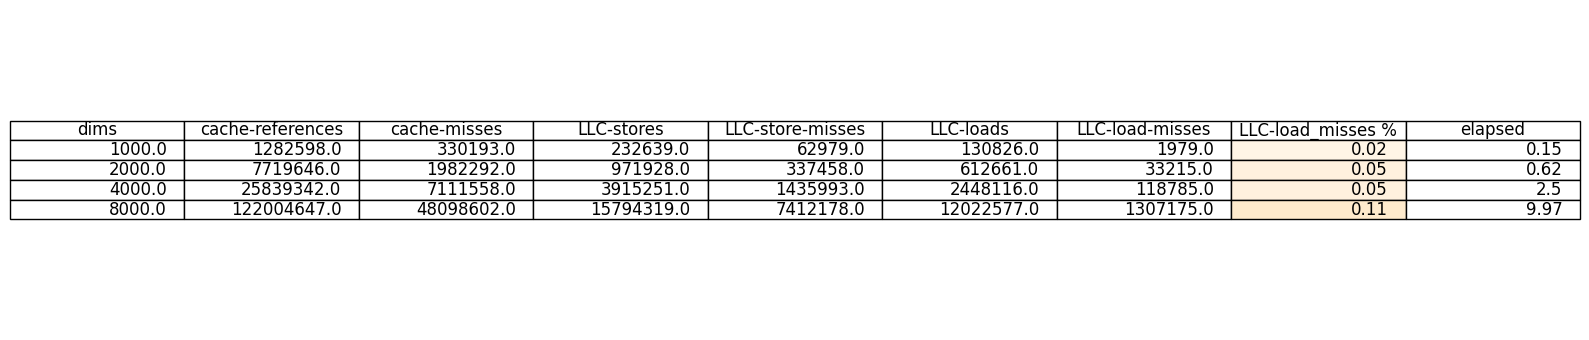

In [85]:
plt.rcParams['figure.figsize'] = [16, 3.5 ]
plt.rcParams['figure.autolayout'] = True
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

colors=[]
colormap = plt.cm.get_cmap('OrRd')
for x in df['LLC-load_misses %' ]:
    colors.append( colormap( x ) )

the_table = ax.table( cellText=df.values, colLabels=df.columns, loc='center')

the_table.get_celld()[(1,7)].set_facecolor(colors[0])
the_table.get_celld()[(2,7)].set_facecolor(colors[1])
the_table.get_celld()[(3,7)].set_facecolor(colors[2])
the_table.get_celld()[(4,7)].set_facecolor(colors[3])

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
plt.show()

In [86]:
# read in and parse tiled 8 unroll 2 data

dims=[]
cr=[]
cm=[]
llcs=[]
llcsm=[]
llcl=[]
llclm=[]
elapsed=[]

with open('datasets/working_set_tiled_8_unroll_8.out') as f:
    for line in f:
        if 'Performance counter stats' in line:
            line_split = line.split()
            dims.append( int( line_split[-1][:-2] ) )
        elif 'cache-references' in line:
            line_split = line.split()
            cr.append( float( line_split[0].replace(',', '') ) )
        elif 'cache-misses' in line:
            line_split = line.split()
            cm.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-stores' in line:
            line_split = line.split()
            llcs.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-store-misses' in line:
            line_split = line.split()
            llcsm.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-loads' in line:
            line_split = line.split()
            llcl.append( float( line_split[0].replace(',', '') ) )
        elif 'LLC-load-misses' in line:
            line_split = line.split()
            llclm.append( float( line_split[0].replace(',', '') ) )
        elif 'seconds time elapsed' in line:
            line_split = line.split()
            elapsed.append( float( line_split[0].replace(',', '') ) )

In [87]:
df = pd.DataFrame()
df['dims'] = dims
df['cache-references'] = cr
df['cache-misses'] = cm
df['LLC-stores'] = llcs
df['LLC-store-misses'] = llcsm
df['LLC-loads'] = llcl
df['LLC-load-misses'] = llclm
df['LLC-load_misses %' ] = ( df['LLC-load-misses'] / df['LLC-loads'] )
df['LLC-load_misses %' ] = df['LLC-load_misses %' ].round(2)
df['elapsed'] = elapsed
df['elapsed'] = df['elapsed'].round(2)

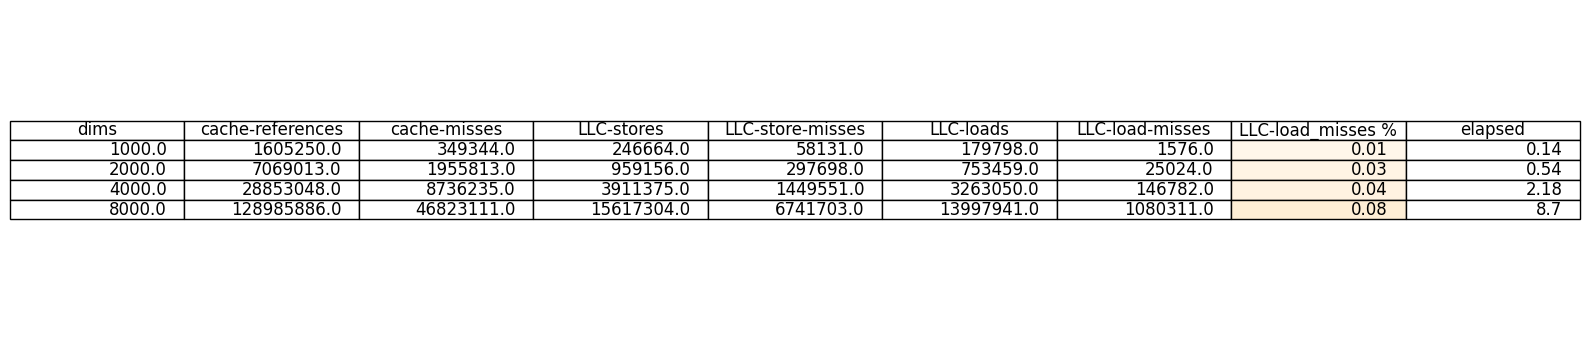

In [88]:
plt.rcParams['figure.figsize'] = [16, 3.5 ]
plt.rcParams['figure.autolayout'] = True
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

colors=[]
colormap = plt.cm.get_cmap('OrRd')
for x in df['LLC-load_misses %' ]:
    colors.append( colormap( x ) )

the_table = ax.table( cellText=df.values, colLabels=df.columns, loc='center')

the_table.get_celld()[(1,7)].set_facecolor(colors[0])
the_table.get_celld()[(2,7)].set_facecolor(colors[1])
the_table.get_celld()[(3,7)].set_facecolor(colors[2])
the_table.get_celld()[(4,7)].set_facecolor(colors[3])

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
plt.show()

In [102]:
df = pd.DataFrame()
df['opt'] = ['baseline', 'unroll8tiled1', 'unroll8tiled2', 'unroll8tiled4', 'unroll8tiled8']
df['runtime'] = [11.57, 12.34, 9.97, 8.95, 8.7 ]
baseline = df['runtime'][0]
df['speedup'] = baseline / df['runtime']
df['cache-misses']      = [ 1320041917, 44333566, 48098602, 36539972, 46823111 ]
df['LLC-stores']        = [ 50123926, 16080540, 15794319, 15853294, 15617304 ]
df['LLC-stores-ratio']  = df['LLC-stores'] / df['LLC-stores'][0]
df['LLC-store-misses']  = [ 24099435, 6977425, 7412178, 6785697, 6741703 ]
df['LLC-store-misses-ratio'] = df['LLC-store-misses'] / df['LLC-store-misses'][0]
df['LLC-loads']         = [ 8200439, 13896843, 12022577, 10059612, 13997941 ]
df['LLC-loads-ratio']   = df['LLC-loads'] / df['LLC-loads'][0]
df['LLC-load-misses']   = [ 7568447, 3197049,  1307175, 872447, 1080311 ]
df['LLC-load-misses-ratio'] = df['LLC-load-misses'] / df['LLC-load-misses'][0]

df

,opt,runtime,speedup,cache-misses,LLC-stores,LLC-stores-ratio,LLC-store-misses,LLC-store-misses-ratio,LLC-loads,LLC-loads-ratio,LLC-load-misses,LLC-load-misses-ratio
0,baseline,11.57,1.000000,1320041917,50123926,1.000000,24099435,1.000000,8200439,1.000000,7568447,1.000000
1,unroll8tiled1,12.34,0.937601,44333566,16080540,0.320816,6977425,0.289526,13896843,1.694646,3197049,0.422418
2,unroll8tiled2,9.97,1.160481,48098602,15794319,0.315105,7412178,0.307566,12022577,1.466089,1307175,0.172714
3,unroll8tiled4,8.95,1.292737,36539972,15853294,0.316282,6785697,0.281571,10059612,1.226716,872447,0.115274
4,unroll8tiled8,8.70,1.329885,46823111,15617304,0.311574,6741703,0.279745,13997941,1.706975,1080311,0.142739


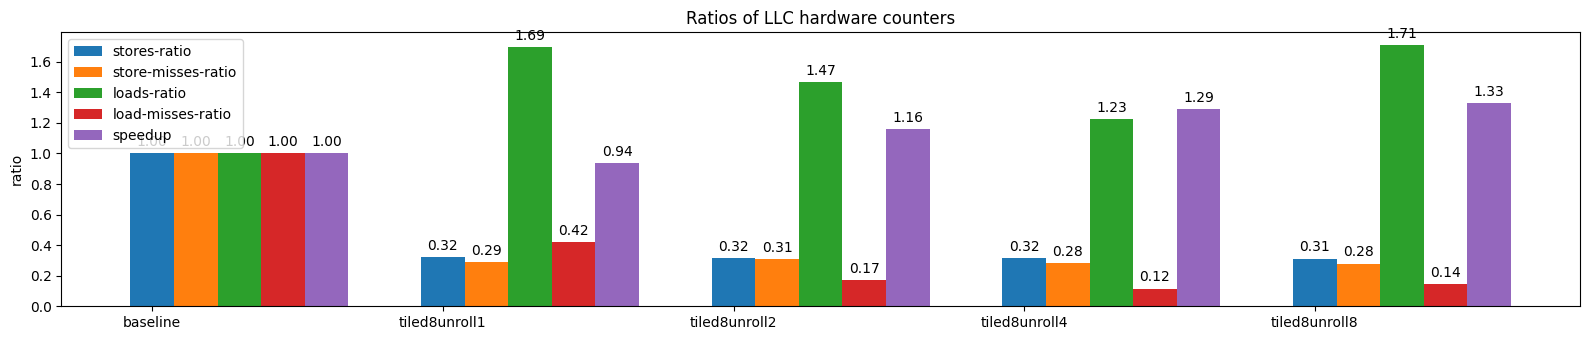

In [106]:
labels = ['baseline', 'tiled8unroll1', 'tiled8unroll2', 'tiled8unroll4', 'tiled8unroll8' ]

llcsr   = df['LLC-stores-ratio']
llcsmr  = df['LLC-store-misses-ratio']
llclr   = df['LLC-loads-ratio']
llcmr   = df['LLC-load-misses-ratio']
speedup = df['speedup']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

r1 = np.arange(len(llcsr))
r2 = [t + width for t in r1]
r3 = [t + width for t in r2]
r4 = [t + width for t in r3]
r5 = [t + width for t in r4]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, llcsr,  width, label='stores-ratio')
rects2 = ax.bar(r2, llcsmr, width, label='store-misses-ratio')
rects3 = ax.bar(r3, llclr, width, label='loads-ratio')
rects4 = ax.bar(r4, llcmr, width, label='load-misses-ratio')
rects5 = ax.bar(r5, speedup, width, label='speedup')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ratio')
ax.set_title('Ratios of LLC hardware counters')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')
ax.bar_label(rects3, padding=3, fmt='%.2f')
ax.bar_label(rects4, padding=3, fmt='%.2f')
ax.bar_label(rects5, padding=3, fmt='%.2f')

fig.tight_layout()

plt.show()